In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [206]:
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

def custom_activation(x):
    return (K.sigmoid(2*x))

In [294]:
init = RandomUniform(minval=-10, maxval=10)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(3,), kernel_initializer=init, bias_initializer=init))

model.add(Dense(20, activation='tanh', kernel_initializer=init, bias_initializer=init))
model.add(Dense(20, activation='tanh', kernel_initializer=init, bias_initializer=init))
model.add(Dense(200, activation='relu', kernel_initializer=init, bias_initializer=init))

model.add(Dense(5, activation='tanh', kernel_initializer=init, bias_initializer=init))

model.add(Dense(3*3*3, activation=custom_activation))

In [295]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 10)                40        
_________________________________________________________________
dense_111 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_113 (Dense)            (None, 200)               4200      
_________________________________________________________________
dense_114 (Dense)            (None, 5)                 1005      
_________________________________________________________________
dense_115 (Dense)            (None, 27)                162       
Total params: 6,047
Trainable params: 6,047
Non-trainable params: 0
_________________________________________________________________


In [304]:
x_size = 2048
y_size = 2048

x = np.linspace(-3, 3, x_size)
y = np.linspace(-3, 3, y_size)

In [305]:
xy = np.meshgrid(x, y)

In [306]:
tensor_data = []

for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        tensor_data.append([xi, yj , np.sqrt(xi**2 + yj**2)])
        
tensor_data = np.asarray(tensor_data)

In [307]:
model.input

<tf.Tensor 'dense_110_input:0' shape=(?, 3) dtype=float32>

In [308]:
tensor_data.shape

(4194304, 3)

In [309]:
output = model.predict(tensor_data)

In [310]:
reshaped = np.reshape(output, (x_size, y_size, 3*3*3))

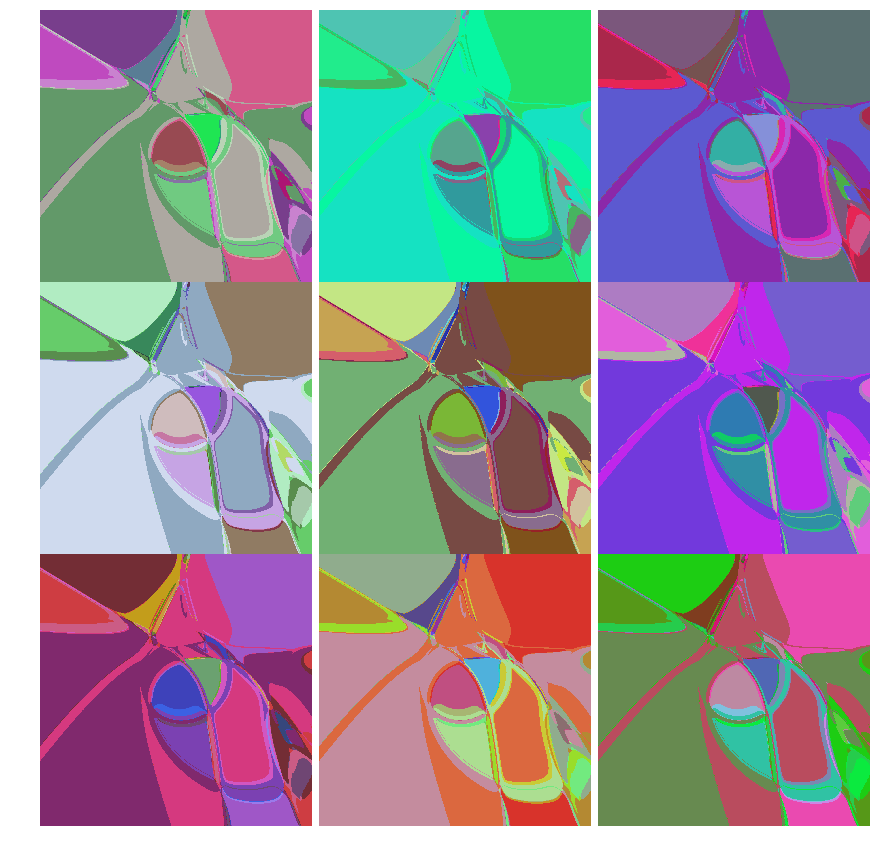

In [311]:
plt.figure(figsize=(15, 15))
plt_x = 3
plt_y = 3
for i in range(plt_x*plt_y):
    plt.subplot(plt_x, plt_y, i+1)
    plt.axis('off')
    plt.imshow(reshaped[:, :, 3*i:3*i+3], cmap='Greys')
plt.subplots_adjust(wspace=0, hspace=0)

In [315]:
#plt.figure(figsize=(15, 15))
#plt.axis('off')
#plt.imshow(reshaped[:, :, 7:10], cmap='Greys')
plt.imsave('datimg23.png', reshaped[:, :, 7:10])

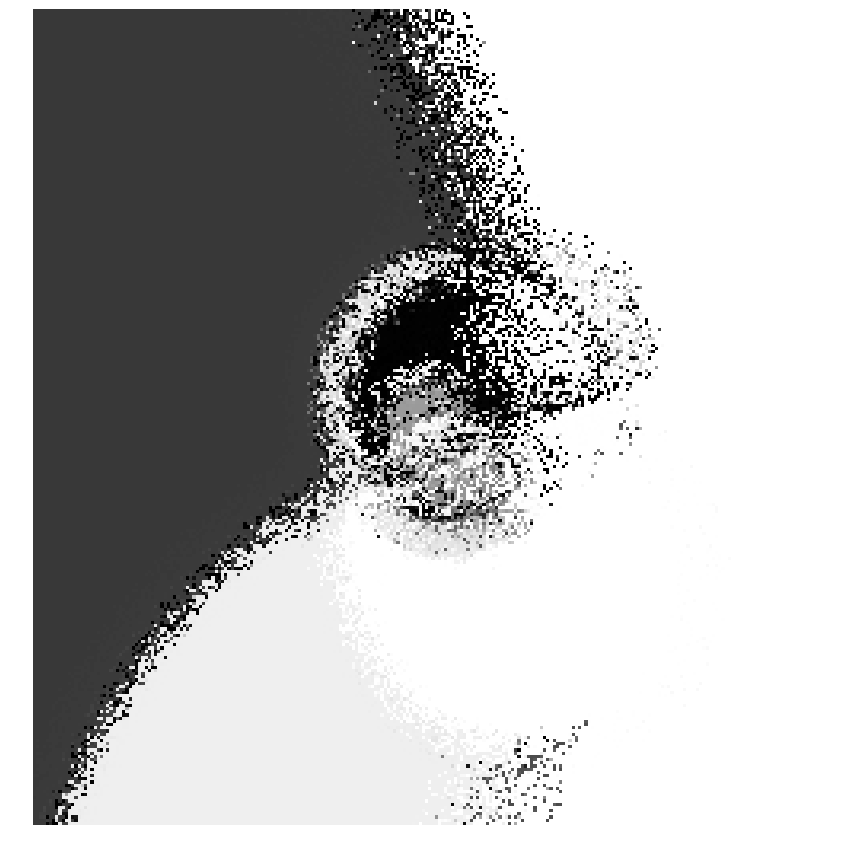

In [129]:
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(reshaped[:, :, 1], cmap='Greys')

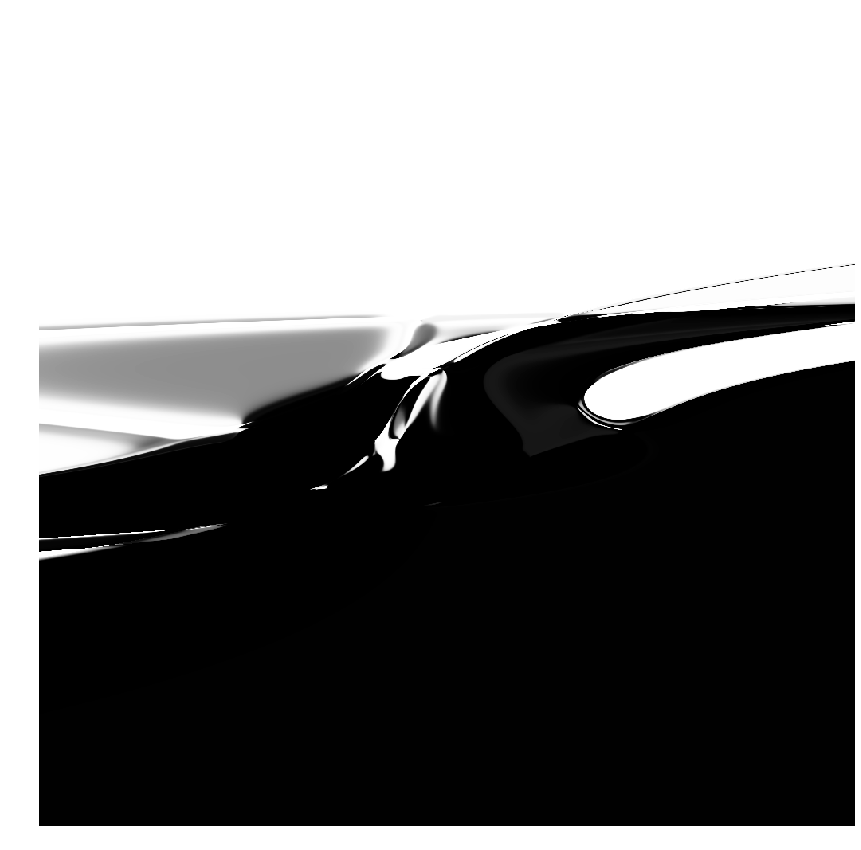

In [66]:
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(reshaped[:, :, 2], cmap='Greys')